# VISUALIZACIÓN DE DATOS EN PYTHON

## Visualización estática

**Estadísticos**: Seguiremos trabajando con el conjunto de datos de 120 años de historia olímpica adquirido por Randi Griffin en Randi Griffin

Como especialista en visualización, su tarea consiste en crear dos parcelas para los ganadores de medallas de 2016 de cinco deportes: atletismo, natación, remo, fútbol y hockey

Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

Utilizar su creatividad y sus habilidades para sacar conclusiones importantes de los datos.

### Análisis exploratorio de los datos (EDA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv"
data=pd.read_csv(url)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [14]:
data['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [4]:
deporte=['Athletics','Swimming','Football','Rowing','Hockey']
data_top5=data[data['Sport'].isin(deporte) & (data['Year'] == 2016) & (data['Medal'].notnull())]
data_top5.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


### Imputación de datos faltantes

In [22]:
### Verificación de datos faltantes:
missing_data=data_top5.isnull().sum()
missing_data

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Vemos que 2 variables tienen datos faltantes Son pocos datos, se optó por realizar imputación de los datos faltantes en lugar de eliminarlos. 

In [21]:
median_Weight = data_top5['Weight'].median()
median_Height=data_top5['Height'].median()
data_top5['Weight'].fillna(median_Weight, inplace=True)
data_top5['Height'].fillna(median_Height, inplace=True)

### Análisis exploratorio (TOP 5)

In [6]:
data_top5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 158 to 271019
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      732 non-null    int64  
 1   Name    732 non-null    object 
 2   Sex     732 non-null    object 
 3   Age     732 non-null    float64
 4   Height  729 non-null    float64
 5   Weight  727 non-null    float64
 6   Team    732 non-null    object 
 7   NOC     732 non-null    object 
 8   Games   732 non-null    object 
 9   Year    732 non-null    int64  
 10  Season  732 non-null    object 
 11  City    732 non-null    object 
 12  Sport   732 non-null    object 
 13  Event   732 non-null    object 
 14  Medal   732 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 91.5+ KB


En la muestra se tienen 84576 registros y 15 columnas, con 5 variables numéricas y 10 de tipo objeto o categóricas. 

Las variables presentes son:

In [7]:
data_top5.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
data_top5.shape

(732, 15)

In [29]:
data_top5.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,732.0,68648.244536,39361.251654,62.0,32676.75,73187.0,103225.0,135525.0
Age,732.0,25.577869,4.451373,16.0,22.00,25.0,29.0,40.0
Height,732.0,180.023224,10.055700,150.0,173.00,180.0,187.0,207.0
Weight,732.0,73.709016,14.230803,40.0,64.00,72.0,82.0,136.0
Year,732.0,2016.000000,0.000000,2016.0,2016.00,2016.0,2016.0,2016.0


Los ganadores de medallas en el top 5 de deportes para el año 2016 tenían un peso promedio de 73,7 Kg con una desviación  estándar de 14.23. Adicional a eso, una altura promedio de 180.02 cm, con registros mínos de 150.0 cm y 207.0 cm

In [10]:
data_top5.describe(include=object).T

,count,unique,top,freq
Name,732,648,"Michael Fred Phelps, II",6
Sex,732,2,M,377
Team,732,54,United States,127
NOC,732,54,USA,127
Games,732,1,2016 Summer,732
Season,732,1,Summer,732
City,732,1,Rio de Janeiro,732
Sport,732,5,Athletics,192
Event,732,99,Football Women's Football,54
Medal,732,3,Gold,254


Vemos que participaron 54 equipos en total, y que se obtuvieron en general 254 medallas de oro de 737 en total. 

### Gráfico 1

Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.

In [11]:
deporte

['Athletics', 'Swimming', 'Football', 'Rowing', 'Hockey']

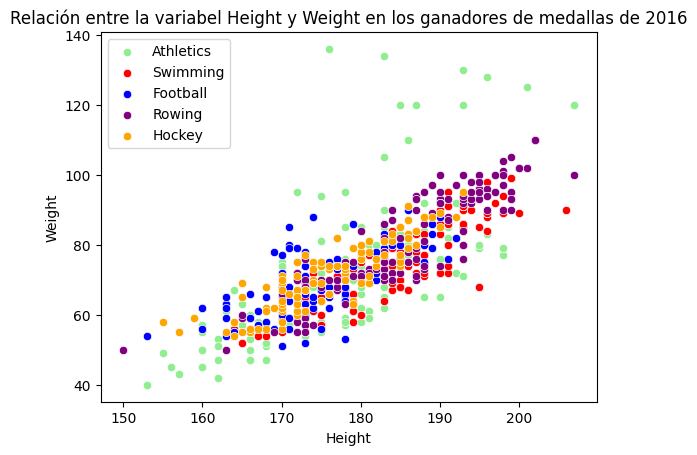

In [12]:
fig,ax=plt.subplots()
ax = sns.scatterplot(x="Height", y="Weight", data=data_top5[data_top5['Sport']=='Athletics'], color='lightgreen')
ax = sns.scatterplot(x="Height", y="Weight", data=data_top5[data_top5['Sport']=='Swimming'], color='red')
ax = sns.scatterplot(x="Height", y="Weight", data=data_top5[data_top5['Sport']=='Football'], color='blue')
ax = sns.scatterplot(x="Height", y="Weight", data=data_top5[data_top5['Sport']=='Rowing'], color='purple')
ax = sns.scatterplot(x="Height", y="Weight", data=data_top5[data_top5['Sport']=='Hockey'], color='orange')
ax.legend(labels=deporte)
plt.title("Relación entre la variabel Height y Weight en los ganadores de medallas de 2016")
plt.show()

Puede visualizarse la tendencia presente entre las variables peso y altura de los participantes ganadores en el top 5 de deportes. Puede verse que a medida que aumenta la altura del participante, aumenta su peso, lo cual es lógico. En atletismo hay mayores degistros de peso por encima de los 100kg, con altura superior a los 180 cm. 

### Gráfico 2

Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

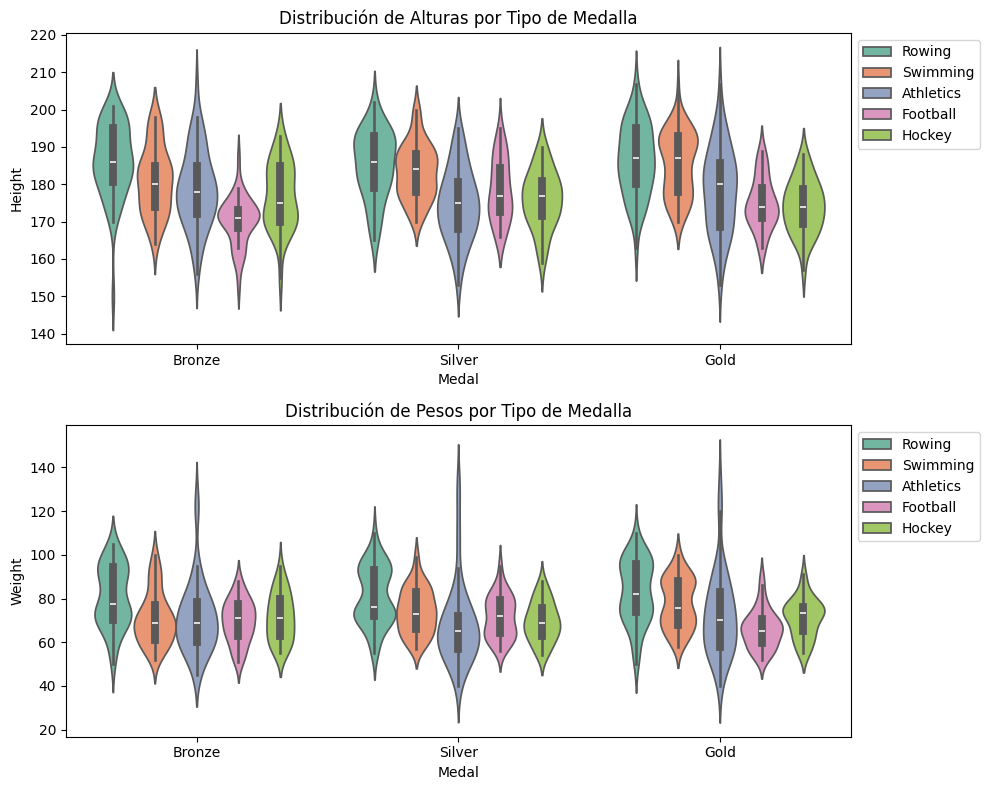

In [13]:
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax=sns.violinplot(x='Medal',y='Height', data=data_top5, hue='Sport', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución de Alturas por Tipo de Medalla')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax=sns.violinplot(x='Medal',y='Weight', data=data_top5,hue='Sport',  ax=axes[1], palette='Set2')
axes[1].set_title('Distribución de Pesos por Tipo de Medalla')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()